# Create Some Plots

In [48]:
import os, sys, glob

from blimpy import Waterfall
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from turbo_seti.find_event.plot_event import plot_waterfall

%matplotlib inline

In [44]:
def display(png, size=(20,12), invert=False):
    
    import matplotlib.pyplot as plt
    from PIL import Image
    

    im = Image.open(png)
    
    if invert:
        im = im.rotate(270)
        
    img = np.asarray(im)
    
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.show()

In [2]:
dataDir = '/datax/scratch/noahf/satCheckTesting/'
h5Path = dataDir + 'GBT_57549_04432_HIP59774_fine.h5'

!ls $h5Path

/datax/scratch/noahf/satCheckTesting/GBT_57549_04432_HIP59774_fine.h5


In [5]:
wf = Waterfall(h5Path, max_load=19)

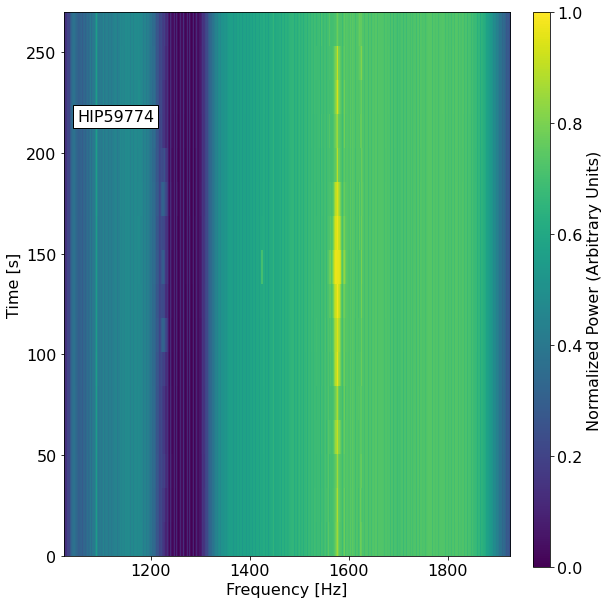

In [104]:
plot_f, plot_data = wf.grab_data()

extent=(plot_f[-1], plot_f[0], 0.0, (wf.timestamps[-1]-wf.timestamps[0])*24.*60.*60)

fig, ax = plt.subplots(figsize=(8,10))

this_plot = plot_waterfall(wf, "HIP59774")

data = np.fliplr(np.array(this_plot.get_array()))

this_plot2 = plt.imshow(data,
        aspect='auto',
        rasterized=True,
        interpolation='nearest',
        extent=extent)

cax = fig.add_axes([0.94, 0.11, 0.03, 0.77])
fig.colorbar(this_plot2,cax=cax,label='Normalized Power (Arbitrary Units)')

plt.show()
fig.savefig('HIP59774_wf.png', transparent=False)

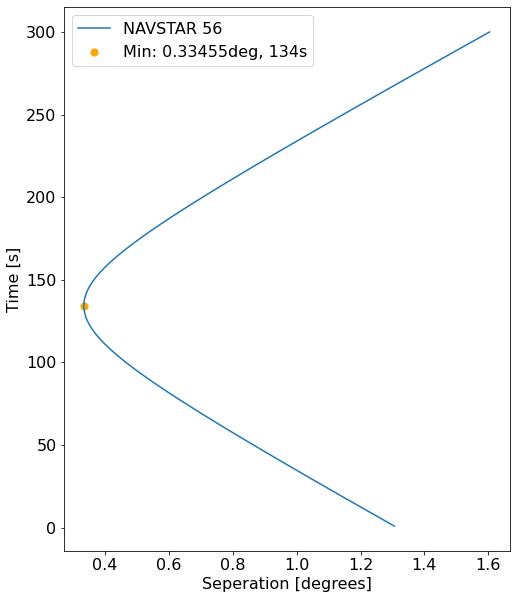

In [105]:
df = pd.read_csv('~/SatCheck/NAVSTAR_56_-USA_180-_28474_separation_HIP59774_fine.csv')
time = df['Time after start']
sep = df['Separation']

fig, ax = plt.subplots(figsize=(8,10))
ax.plot(sep, time, label='NAVSTAR 56')
ax.set_ylabel('Time [s]')
ax.set_xlabel('Seperation [degrees]')

minpoint = min(sep)

minindex = np.where(sep == minpoint)[0] #df['Separation'].index(minpoint)
mintime = int(time[minindex])

ax.scatter(minpoint, mintime, s = 50, label = 'Min: ' + str("%.5fdeg" % minpoint) + ', ' + str(mintime) + "s", color='orange')

ax.legend();
fig.savefig('HIP59774_separation.png', transparent=False)